# 01. DNN기초 - 기본 레이어
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [2]:
class LinearLayer():
  # 학습파라미터 (W, b)의 shape 설정
  def __init__(self, d_in, d_out):
    W_shape = (d_in, d_out)
    B_shape = (d_out)
    # 행렬 만들기
    self.W = np.random.normal(0, 1, W_shape)  # 평균0,  편차1
    self.B = np.zeros(B_shape)# Blas(덧셈) 디폴트값을 0

  def forward(self, X):
    return X@self.W+self.B
  

layer1 = LinearLayer(d_in=3, d_out=3)
layer2 = LinearLayer(d_in=3, d_out=2)
print(layer1.W, layer1.B)
print(layer2.W, layer2.B)
X=np.array([[1,2,1]])
print(f'X:{X} shape:{X.shape}')
print(f'첫번째 레이어 계산결과:{layer1.forward(X)}')
print(f'두번째 레이어 계산결과:{layer2.forward(layer1.forward(X))}')

[[-0.9341185   1.10947115 -0.16849867]
 [-0.30273713  0.26832505  0.46521902]
 [-1.23602552  0.18055022 -0.63075055]] [0. 0. 0.]
[[-1.27902356 -0.29726202]
 [-0.2794979   0.41230505]
 [ 0.67957332  0.49744747]] [0. 0.]
X:[[1 2 1]] shape:(1, 3)
첫번째 레이어 계산결과:[[-2.77561827  1.82667146  0.13118882]]
두번째 레이어 계산결과:[[3.12868274 1.64349132]]


In [3]:
class Model():
  def __init__(self):
    self.layer1 = LinearLayer(d_in=3, d_out=3)
    self.layer2 = LinearLayer(d_in=3, d_out=2)

  def predict(self, x):
    z = self.layer1.forward(X)
    y = self.layer2.forward(z)
    return y


  #학습 파라미터를 반환하는 함수
  def get_weights(self):
    return [ self.layer1.W, self.layer1.B, self.layer2.W, self.layer2.B ]

  def set_weights(self, new_weight_list):
    self.layer1.W = new_weight_list[0]
    self.layer1.B = new_weight_list[1]
    self.layer2.W = new_weight_list[2]
    self.layer2.B = new_weight_list[3]

* 모델 불러오기

In [4]:
model = Model()
model.predict(X)

array([[-2.74825775,  1.50276554]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [5]:
X = np.array([[1,2,1]]) # X shape : (1,3)
W1_ =np.array([1,1,-1,1,0.5,-1,1,1,1]).reshape(3,3)
B1_ =np.array([0,0,0]).reshape(1,3)
W2_ =np.array([1,0.5,-1,0.5,0,1]).reshape(3,2)
B2_ =np.array([1,-0.5]).reshape(1,2)
print(f'{X} X shape: {X.shape}')
print(f'{W1_} X shape: {W1_.shape}')
print(f'{B1_} X shape: {B1_.shape}')
print(f'{W2_} X shape: {W2_.shape}')
print(f'{B2_} X shape: {B2_.shape}')

[[1 2 1]] X shape: (1, 3)
[[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]] X shape: (3, 3)
[[0 0 0]] X shape: (1, 3)
[[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]] X shape: (3, 2)
[[ 1.  -0.5]] X shape: (1, 2)


* 학습 파라미터 확인

In [6]:
model.get_weights()

[array([[-0.39674782,  1.08343562, -0.69322158],
        [-1.46566254,  0.52896777,  1.85211152],
        [ 0.96686133, -0.52607817,  0.32026892]]),
 array([0., 0., 0.]),
 array([[ 0.3055733 ,  0.50972299],
        [-0.92905395, -0.13669382],
        [-0.15790979,  0.87868278]]),
 array([0., 0.])]

* 학습 파라미터 세팅

In [7]:
model.set_weights([W1_, B1_, W2_, B2_])

* 예측 (순전파)

In [8]:
model.predict(X)

array([[2., 1.]])

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
--------사용안함--------------
- Step Function





-------마지막 층에서 사용-----
- Sigmoid : 예측결과가 두개중 하나
- Softmax : 예측 결과가 세개 이상 클래스 중 하나

만약 마지막 층에서 활성화 안쓰면 회귀



-------중간 층에서 사용-------
중간 층에서 사용될 때는 gradient(미분) 값이 중요
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
```


* 시각화를 위한 플롯팅 함수ㄸ

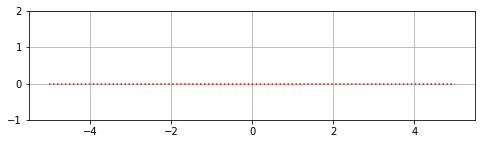

In [9]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.grid()

plot_func(xs=[1], ys=[1])

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [10]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

sigmoid(5)

0.9933071490757153

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [11]:
def sigmoid_grad(x):
  return sigmoid(x)*(1-sigmoid(x))

sigmoid_grad(0)

0.25

* 시각화

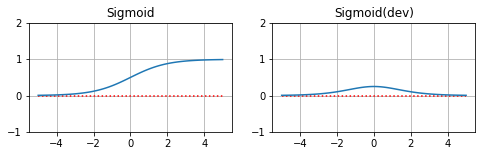

In [12]:
#xs = np.array([-2,-1,0,1,2])
xs = np.linspace(-5, 5, 100)
plt.subplot(1,2,1);plot_func(xs, sigmoid(xs), title='Sigmoid')
plt.subplot(1,2,2);plot_func(xs, sigmoid_grad(xs), title='Sigmoid(dev)')



**Sigmoid 소개**

```
- # 나오게 된 배경
output을 확률로 압축하기위해서 시그모이드 함수를 많이 활용한다.
- # 장단점
단점 : 속도가 느림, 학습시간이 오래걸림, 기울기가 소실될 수 있음
- # 특징 정리 (출력 범위, 미분 값 등 )
출력 범위 0-1, 미분 값 0-0.25
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [13]:
# 함수의 인풋 : 1차 텐서,  아웃풋: 1차텐서
def softmax(xs):  # [1, 2, 1]
  exs = np.exp(xs)  # [np.exp(1), np.exp(2), np.exp(1)]
  sum_exs = np.sum(exs) # np.exp(1)+ np.exp(2)+ np.exp(1) # 0차텐서
  return exs / sum_exs
# 아웃폿의 요소들은 0~1까지의 값을 가지고 모두 더하면 1이된다.

softmax(np.array([1,2,1,1]))

array([0.1748777 , 0.47536689, 0.1748777 , 0.1748777 ])

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [14]:
# 예측 [0.7,0.2,0.1] 실제 [1,0,0] -> 0번째 클래스가 정답!
# 미분 -> [0.7 * sortmax = [1,0,0]]

def softmax_grad(xs, j=0):
  return (softmax(xs)*(1-softmax(xs)))[j]

softmax_grad(np.array([0.7, 0.2, 1]))


0.223837075668383

* 시각화


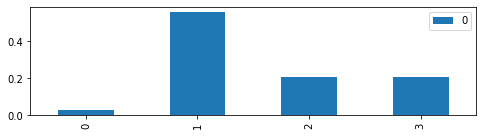

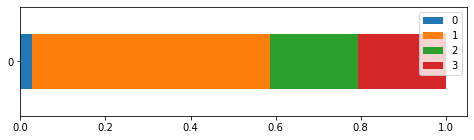

In [15]:
ys = softmax(np.array([-1,2,1,1]))
pd.DataFrame(softmax(np.array([-1,2,1,1]))).plot(kind='bar')
pd.DataFrame([ys]).plot(kind='barh', stacked=True)


**Softmax 소개**

```
- # 나오게 된 배경
분류 문제를 풀 때 값을 확률로 변환하기 위해
- # 장단점
출력을 해석하는데 매우 유용
- # 특징 정리 (출력 범위, 미분 값 등 )
모든 출력의 합이 1

```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [16]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

tanh(1)

0.7615941559557649

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [17]:
def tanh_grad(x):
  return 1-(tanh(x)**2)

tanh_grad(1)

0.41997434161402614

* 시각화

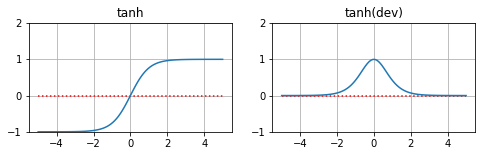

In [18]:
xs = np.linspace(-5, 5, 100)
plt.subplot(1,2,1);plot_func(xs, tanh(xs), title='tanh')
plt.subplot(1,2,2);plot_func(xs, tanh_grad(xs), title='tanh(dev)')


**Tanh 소개**

```
- # 나오게 된 배경
시그모이드의 미분 값은 0-0.25 사이의 값만 표현가능 역전파로 결과값에 대한 가중치 계산시 소실됨, 이를 방지하기 위해 탄젠트 활성화 함수 도입
- # 장단점
학습시간이 빠름
- # 특징 정리 (출력 범위, 미분 값 등 )
출력범위 -1~1,   미분값 0-1
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

In [19]:
def relu(x):
  return np.maximum(0,x)

relu(1)

1

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [20]:
def relu_grad(x):
  return np.where(x>=0, 1, 0)

relu_grad(-1)


array(0)

* 시각화

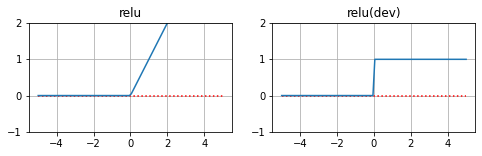

In [21]:
#xs = np.array([-2,-1,0,1,2])
xs = np.linspace(-5, 5, 100)
plt.subplot(1,2,1);plot_func(xs, relu(xs), title='relu')
plt.subplot(1,2,2);plot_func(xs, relu_grad(xs), title='relu(dev)')



**ReLU 소개**

```
- # 나오게 된 배경
시그모이드 함수가 가지고 있는 비효율성을 해결해주면서 성능이 좋고 계산자체도 간단

- # 장단점
장점 : 속도가 빠름, 기울기 소실이 없음
단점 : 음수에서는 미분값이 아예 0이라서 학습이 불가능

- # 특징 정리 (출력 범위, 미분 값 등 )
0이상 그대로 출력, 작으면 0으로 출력, 미분값 0 or 1
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

In [22]:
def leackyrelu(x):
  return np.maximum(0.01*x, x)

def prelu(x, a=0.1):
  return np.maximum(a*x, x)

print(leackyrelu(1), prelu(1, -1))

1.0 1


* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [23]:
def prelu_grad(x, a=0.1):
  return np.where(x >= 0, 1, a)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

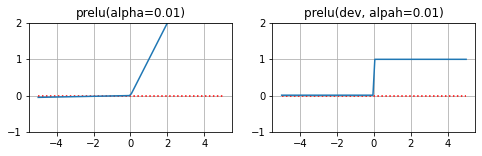

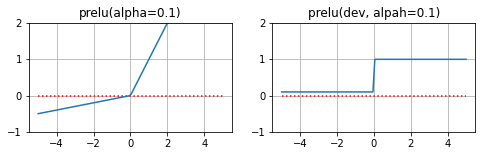

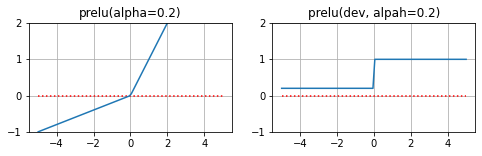

In [24]:
xs = np.linspace(-5, 5, 100)
for alpha in [0.01, 0.1, 0.2]:
  plt.subplot(121);plot_func(xs, prelu(xs, a=alpha), title=f'prelu(alpha={alpha})')
  plt.subplot(122);plot_func(xs, prelu_grad(xs, a=alpha), title=f'prelu(dev, alpah={alpha})')
  plt.show()




**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경
ReLU가 x<0인 것들에 대해서는 기울기가 0이기 때문에, 파라미터 α를 추가하여 x<0에서도 기울기를 학습할 수 있게 하기 위해
- # 장단점
 PReLU는 대규모 이미지 데이터셋에서는 ReLU보다 성능이 좋았지만, 소규모 데이터셋에는 오버피팅될 위험이 있다.
- # 특징 정리 (출력 범위, 미분 값 등 )
0이상 그대로 출력, 작으면 알파 값을 곱해서 출력
- # 알파 값은 보통 어떻게 정해지는가?
일반 적으로 0.01로 설정한다.
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [25]:
def elu(x):
  return np.where(x>=0, x, (np.exp(x)-1))

def selu(x, a=1):
  return np.where(x>=0, x, a*(np.exp(x)-1))



print(elu(1), selu(1))

1.0 1.0


* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [26]:
def elu_grad(x, a=1):
  return np.where(x>=0, 1, (a*np.exp(x))  )

elu_grad(1)

array(1.)

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

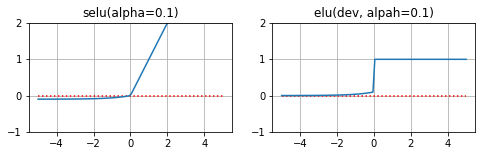

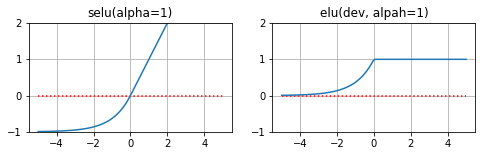

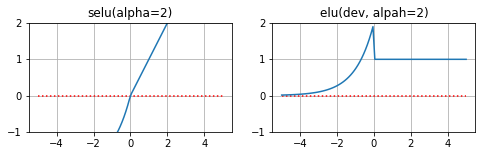

In [27]:
xs = np.linspace(-5, 5, 100)
for alpha in [0.1, 1, 2]:
  plt.subplot(121);plot_func(xs, selu(xs, a=alpha), title=f'selu(alpha={alpha})')
  plt.subplot(122);plot_func(xs, elu_grad(xs, a=alpha), title=f'elu(dev, alpah={alpha})')
  plt.show()



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경
출력의 평균이 0 (zero mean)에 가까워지기 때문에 편향 이동 (bias shift)이 감소하여 그래디언트 소실 문제를 줄여준다.
- # 장단점
ReLU와 달리 exp함수를 사용하여 연산비용이 발생한다.
- # 특징 정리 (출력 범위, 미분 값 등 )
음의 값에 대하여 ReLU와 달리 smooth한 곡선으로 미분이 가능하고 비선형성을 더 잘 모델링한다.
- # 알파 값은 보통 어떻게 정해지는가?
일반적으로 1로 설정된다.
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
 # 신경망을 훈련시킨다는 것은 Back Propagation 알고리즘으로 Output Layer에서 Input Layer로 loss에 대한 그레디언트를 전파하고, 경사 하강법을 통해 이 그레디언트로 loss가 가장 적도록 파라미터를 수정하는 것을 의미합니다. 그런데 ***알고리즘이 하위층으로 진행될수록 그레디언트가 더 작아지는 경우***가 있는데, 이것을 그레디언트 소실이라고 합니다.

2. 딥러닝에서 그래디언트 값이 중요한 이유

# 딥러닝에서 가중치 값은 곧 gradient(기울기)이기 때문에 그 값을 계산해야 효율적인 학습이 가능하다.


3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

# ReLU 함수를 사용





```


```